In [1]:
import pandas as pd

df = pd.read_csv("customers_with_latlon.csv")

# Basic overview
df.info()
df.head()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42272 entries, 0 to 42271
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           42272 non-null  int64  
 1   assigned_date                42272 non-null  object 
 2   customer_id                  42272 non-null  int64  
 3   salesperson_id               38855 non-null  float64
 4   is_cancelled                 42272 non-null  int64  
 5   meeting_preference           22324 non-null  object 
 6   meeting_url                  40599 non-null  object 
 7   created_at                   42272 non-null  object 
 8   updated_at                   42272 non-null  object 
 9   call_start_timestamp         3034 non-null   object 
 10  finished_call_timestamp      34976 non-null  object 
 11  call_join_timestamp          26052 non-null  object 
 12  stage_id                     41965 non-null  float64
 13  customer_joined 

/var/folders/kb/gytvjnzj7w32bpnby4c0ktyr0000gn/T/ipykernel_16235/2666932322.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("customers_with_latlon.csv")


,id,assigned_date,customer_id,salesperson_id,is_cancelled,meeting_preference,meeting_url,created_at,updated_at,call_start_timestamp,...,terms_sent,terms_token,postal_code,assigned_dentist_id,date_of_birth,gender,terms_accepted_ip,terms_accepted_user_agent,latitude,longitude
count,42272.000000,42272,42272.000000,38855.000000,42272.000000,22324,40599,42272,42272,3034,...,16589,33430,42272,41813.000000,19659,42272,1525,1731,37102.000000,37102.000000
unique,NaN,4466,NaN,NaN,NaN,2,40599,42272,42272,3034,...,13770,27663,32074,NaN,7044,3,1210,121,NaN,NaN
top,NaN,2025-01-21 09:45:00.000000,NaN,NaN,NaN,microsoft teams,https://teams.microsoft.com/l/meetup-join/19%3...,2024-07-11 16:26:24.342469,2024-07-11 16:26:34.931337,2024-09-26 15:37:31.249434,...,2024-11-20 11:40:57.569875,58a40b09b9f64ca58b2f8f892e2876a0,L31 5LJ,NaN,2025-02-10,unknown,82.140.149.227,Mozilla/5.0 (iPhone; CPU iPhone OS 18_4_1 like...,NaN,NaN
freq,NaN,32,NaN,NaN,NaN,13857,1,1,1,1,...,9,12,77,NaN,929,29742,9,605,NaN,NaN
mean,55369.673448,NaN,55369.673448,55.584584,0.028222,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,94.038768,NaN,NaN,NaN,NaN,52.382559,-1.129571
std,31403.503619,NaN,31403.503619,44.266327,0.165608,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,62.053977,NaN,NaN,NaN,NaN,2.238687,5.424507
min,14.000000,NaN,14.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-34.858631,-123.650952
25%,28140.000000,NaN,28140.000000,15.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,51.495952,-2.148836
50%,51601.500000,NaN,51601.500000,42.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.000000,NaN,NaN,NaN,NaN,52.055967,-1.221050
75%,83283.500000,NaN,83283.500000,89.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,135.000000,NaN,NaN,NaN,NaN,53.426394,-0.156529


In [2]:
# Count missing values per column
print(df.isnull().sum())

id                                 0
assigned_date                      0
customer_id                        0
salesperson_id                  3417
is_cancelled                       0
meeting_preference             19948
meeting_url                     1673
created_at                         0
updated_at                         0
call_start_timestamp           39238
finished_call_timestamp         7296
call_join_timestamp            16220
stage_id                         307
customer_joined                    0
assigned_date_with_timezone        0
transcript_processed               0
team_id                        42122
call_intention                     0
metadata                       30811
utm_source                     41063
id.1                               0
name                               0
last_name                          0
email                              0
phone                             16
hubspot_id                         0
current_stage_id                   0
t

In [3]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [4]:
df['assigned_date'] = pd.to_datetime(df['assigned_date'], errors='coerce')
df['appointment_day'] = df['assigned_date'].dt.date
df['appointment_weekday'] = df['assigned_date'].dt.day_name()

print(df['appointment_weekday'].value_counts())

appointment_weekday
Tuesday      8319
Wednesday    8217
Monday       7905
Thursday     7648
Friday       6912
Saturday     3145
Sunday        126
Name: count, dtype: int64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Appointments by weekday
sns.countplot(data=df, x='appointment_weekday',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Appointments by Day of Week")
plt.xticks(rotation=45)
plt.show()

# Appointments per salesperson
df['salesperson_id'].value_counts().plot(kind='bar', figsize=(10, 4))
plt.title("Appointments per Salesperson")
plt.xlabel("Salesperson ID")
plt.ylabel("Count")
plt.show()

# Meeting preference
df['meeting_preference'].value_counts().plot(kind='bar')
plt.title("Meeting Preference Distribution")
plt.show()

ModuleNotFoundError: No module named 'seaborn'

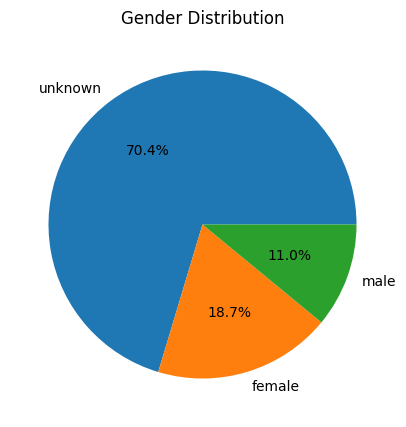

NameError: name 'sns' is not defined

In [6]:
# Gender
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5))
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

# Age
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
df['age'] = pd.Timestamp.now().year - df['date_of_birth'].dt.year

sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.show()

In [7]:
# Quick scatter map by location
sns.scatterplot(data=df, x='longitude', y='latitude', hue='assigned_dentist_id', palette='viridis', legend=False)
plt.title("Customer Locations by Assigned Dentist")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

NameError: name 'sns' is not defined